In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const
import os


Tabelle erstellen:

In [5]:
md = pd.read_csv('tables/spek1.csv')
md_a = md.iloc[:, [0,1]]
print(md.to_latex(index = False, column_format= "c c", decimal=',')) 

\begin{tabular}{c c}
\toprule
 U / V &  I / 10\textasciicircum -9 A \\
\midrule
 1,283 &        0,000 \\
 1,200 &        0,040 \\
 1,100 &        0,075 \\
 1,000 &        0,145 \\
 0,900 &        0,200 \\
 0,800 &        0,298 \\
 0,700 &        0,415 \\
 0,600 &        0,540 \\
 0,500 &        0,660 \\
 0,400 &        0,780 \\
 0,300 &        0,920 \\
 0,200 &        1,000 \\
 0,100 &        1,200 \\
 0,050 &        1,200 \\
 0,000 &        1,300 \\
\bottomrule
\end{tabular}



Daten auswerten:

a = -1.135 ± 0.079
b = 2.600 ± 0.515


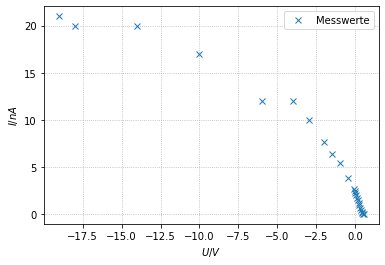

In [6]:
# Lineare Regression
#Daten auslesen
md1 = pd.read_csv(r"tables/spek4s.csv")
md1 = pd.DataFrame(md1).to_numpy()

# x = md1[:,0]
# y = md1[:,1]
# y = np.sqrt(y)

# Für gelb
x1 = md1[:-1,0]
x2 = md1[:,2] * -1 # Weil das mit Pandas und negativen Zahlen nicht klappt beim auslesen aus csv
y1 = md1[:-1,1]
y2 = md1[:,3]

x = np.append(x1,x2)
y = np.append(y1,y2)

# Fit a polynomial of degree 1, return covariance matrix
params, covariance_matrix = np.polyfit(x, y, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.3f} ± {error:.3f}')

x_plot = np.linspace(x[-1], x[0])

plt.plot(x, y, 'x', label="Messwerte")
#plt.plot(
#    x_plot,
#    params[0] * x_plot + params[1],
#    label='Lineare Regression',
#    linewidth=1,
#)
plt.xlabel(r'$U / V$')
plt.ylabel(r'$I / {nA} $')
plt.grid(ls=':')
plt.legend(loc="best")

#Speichern des Plots (und überprüfen ob schon vorhanden)
path = '/pictures/'
if os.path.exists('spek4s.pdf'):
    os.remove('spek4s.pdf')
plt.savefig('pictures/spek4s.pdf')

In [7]:
# U_G berechnen
a = ufloat(-0.531 ,  0.033)
b = ufloat(0.302 , 0.010)
Ug = - (b / a)
print(Ug)

0.57+/-0.04


Berechnung von h / e_0 und Austrittsarbeit

[8.219e+14 9.836e+14 5.494e+14 5.199e+14 4.658e+14]
[1.43  1.24  0.687 0.56  0.57 ]
a = 1.6546412964135995e-15 ± 4.4383191303138835e-16
b = -0.2080989429598537 ± 0.30954497198742315


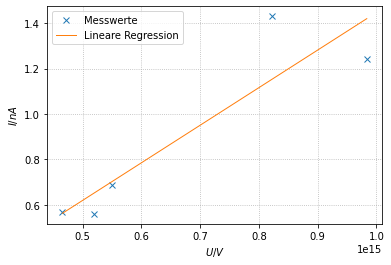

In [8]:
# Daten einlesen
x =  np.array([821.9 ,983.6 ,549.4 ,519.9 ,465.8]) * 10**12
y = np.array([1.430 ,1.24  ,0.687 ,0.560 ,0.570])

print(x)
print(y)

params, covariance_matrix = np.polyfit(x, y, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value} ± {error}')

x_plot = np.linspace(np.min(x), np.max(x))

plt.plot(x, y, 'x', label="Messwerte")
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=1,
)
plt.xlabel(r'$U / V$')
plt.ylabel(r'$I / {nA} $')
plt.grid(ls=':')
plt.legend(loc="best")

#Speichern des Plots (und überprüfen ob schon vorhanden)
path = '/pictures/'
if os.path.exists('austritt.pdf'):
    os.remove('austritt.pdf')
plt.savefig('pictures/austritt.pdf')

In [9]:
np.savetxt('tables/a.txt', md.values, header='f/Hz U/V', fmt='%.3f')
f, U = np.genfromtxt('tables/a.txt', unpack=True, skip_header=1)

def g(f, T):
    w = 2 * np.pi * f
    return 1 / (np.sqrt(1 + w**2 * T**2))

para, pcov = curve_fit(g, f, U)
pcov = np.sqrt(np.diag(pcov))
a = para
fa = pcov 

Fehler berechnen:

In [10]:
ua = ufloat(a, fa) * 1e6
T = ua
print('T = (%.3f +- %.3f )10^-6' % (noms(T), stds(T)))

T = (500826.696 +- 87251.629 )10^-6


Plot erstellen:

(200, 150000)

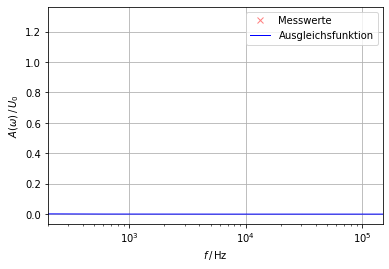

In [11]:

plt.plot(f, U, 'xr', markersize=6 , label = 'Messwerte', alpha=0.5)        # alpha: opacity
xx = np.linspace(100, 150000, 10**4)
plt.plot(xx, g(xx, a), '-b', linewidth = 1, label = 'Ausgleichsfunktion')

plt.xlabel(r'$f \, / \, \mathrm{Hz}$')
plt.ylabel(r'$A(\omega) \, / \, U_0$')
plt.xscale('log')                       # axis scale 
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style
plt.xlim(200, 150000)                   # limitation of visible scale in plot